**Data Analysis  For Frequency Discrimination Threshold Program**

Collaborators: Enya Walker, Kristie Flores

Course: COGS/PSYCH 14P

-----------------------------------------------------
EXPERIMENTER INSTRUCTIONS:

This program graphs data collected from the Frequency Discrimination Threshold Experiment. For each participant, a line graph can be created to show how frequency difference changed across trials for each base frequency. A bar graph can be created comparing frequency discrimination thresholds across subjects and base frequencies. 

Currently, this program is set up to generate graphs for two subjects, with data uploaded from Experiment_Subject1.csv and Experiment_Subject2.csv. To add more subjects or to change subjects, upload the correct .csv files in "IMPORT." Proceed to "SET UP GRAPHS" and follow the commented instructions to edit the code as needed. 

-----------------------------------------------------

**IMPORT**

In [2]:
'''IMPORT PACKAGES'''

import numpy as np       
from numpy import random 
import sounddevice as sd
from matplotlib import pyplot as plt
import pandas as pd

'''UPLOAD .CSV FILES'''

#Name each dataset (e.g. data1) and upload the associated .csv file
data1 = pd.read_csv('Experiment_Subject1.csv')  #Subject 1
data2 = pd.read_csv('Experiment_Subject2.csv')  #Subject 2

**SET UP GRAPHS**

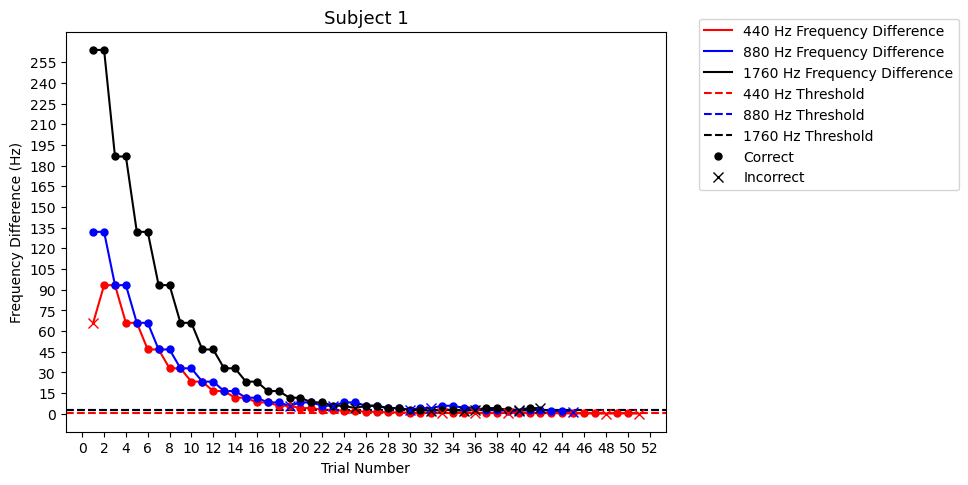

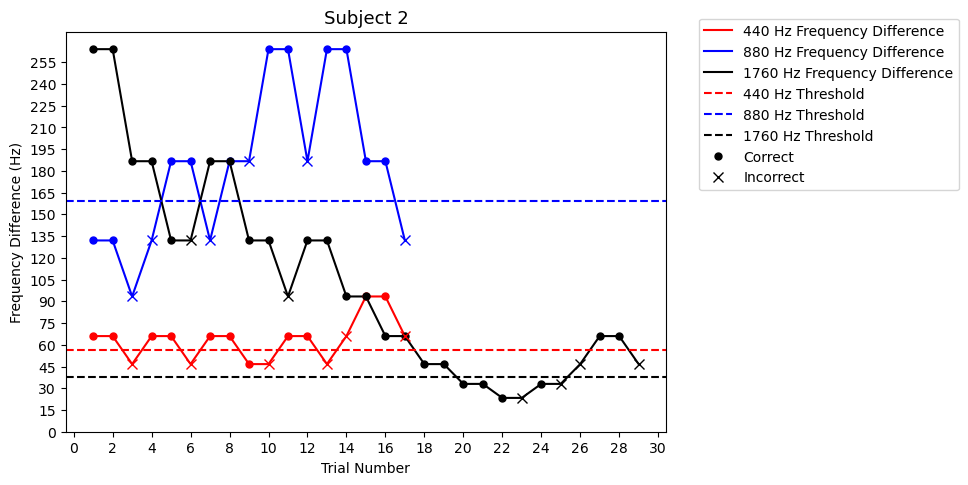

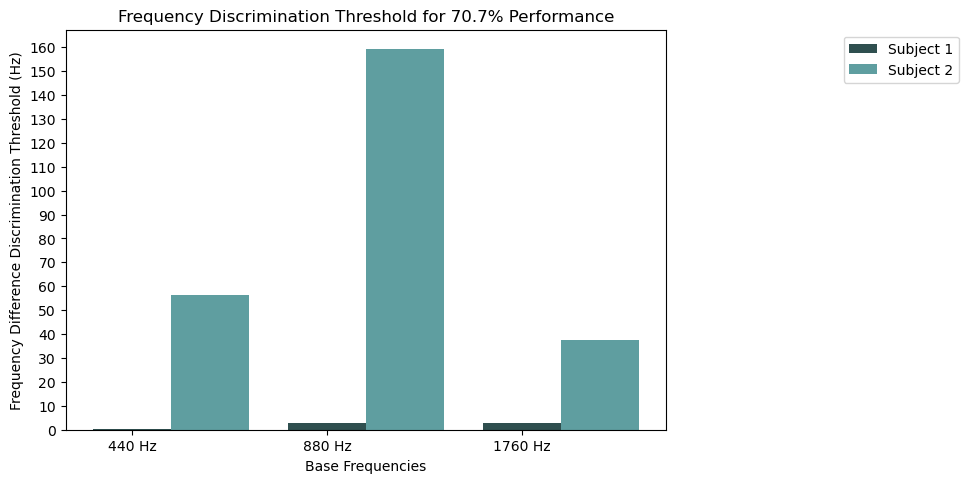

In [32]:
'''FUNCTION TO ESTIMATE 70.7% PERFORMANCE THRESHOLD'''

def means (dataset):
    freqdiff = (dataset['Frequency Difference (Hz)'])
    basefreq = (dataset['Base Frequency of Stimulus A'])
    subjresponse = (dataset['Subject Response'])
    correctresponse = (dataset['Correct Response'])

    incorrect440 = freqdiff [(basefreq == 440) & (subjresponse != correctresponse)]
    incorrect880 = freqdiff [(basefreq == 880) & (subjresponse != correctresponse)]
    incorrect1760 = freqdiff [(basefreq == 1760) & (subjresponse != correctresponse)]

    mean440 = np.mean(incorrect440[2:6])
    mean880 = np.mean(incorrect880[2:6])
    mean1760= np.mean(incorrect1760[2:6])
    return mean440, mean880, mean1760

'''CALCULATE THRESHOLD VALUES'''

#For each additional subject, create a new line and relabel variables mean440_x, mean880_x, etc.
#Enter corresponding dataset name (e.g. data1) into the means function
mean440_1,mean880_1,mean1760_1 = means(data1)
mean440_2,mean880_2,mean1760_2 = means(data2)

#Create a list of threshold values for each subject
#Add new lists as needed for additional subjects
subject1_x = (mean440_1,mean880_1,mean1760_1) #Subject 1; use as x1 for bar graph
subject2_x = (mean440_2,mean880_2,mean1760_2) #Subject 2; use as x2 for bar graph

'''FUNCTION FOR LINE GRAPHS'''

def graph (x,title,mean440,mean880,mean1760):
    x['Response'] = np.where(x['Subject Response'] == x['Correct Response'],'Correct','Incorrect')
    x = x.drop(['Subject Response','Correct Response'],axis=1)
    xmax = np.max(x['Trial Number'])
    ymax = np.max(x['Frequency Difference (Hz)'])

    data_440 = x.loc[x['Base Frequency of Stimulus A']==440]
    data_880 = x.loc[x['Base Frequency of Stimulus A']==880]
    data_1760 = x.loc[x['Base Frequency of Stimulus A']==1760]
    data_440corr = data_440.loc[data_440['Response']=="Correct"]
    data_880corr = data_880.loc[data_880['Response']=="Correct"]
    data_1760corr = data_1760.loc[data_1760['Response']=="Correct"]
    data_440incorr = data_440.loc[data_440['Response']=="Incorrect"]
    data_880incorr = data_880.loc[data_880['Response']=="Incorrect"]
    data_1760incorr = data_1760.loc[data_1760['Response']=="Incorrect"]

    fig = plt.figure()   
    ax = fig.add_axes([0,0,1,1]) 
    ax.plot(data_440["Trial Number"],data_440["Frequency Difference (Hz)"],'r-',label='440 Hz Frequency Difference')
    ax.plot(data_880["Trial Number"],data_880["Frequency Difference (Hz)"],'b-',label='880 Hz Frequency Difference')
    ax.plot(data_1760["Trial Number"],data_1760["Frequency Difference (Hz)"],'k-',label='1760 Hz Frequency Difference')
    ax.axhline(y = mean440, color = 'r', linestyle = '--',label = "440 Hz Threshold")
    ax.axhline(y = mean880 , color = 'b', linestyle = '--',label = "880 Hz Threshold") 
    ax.axhline(y = mean1760, color = 'k', linestyle = '--', label = "1760 Hz Threshold")
    ax.plot(data_440corr["Trial Number"],data_440corr["Frequency Difference (Hz)"],'ro',markersize=5)
    ax.plot(data_880corr["Trial Number"],data_880corr["Frequency Difference (Hz)"],'bo',markersize=5)
    ax.plot(data_1760corr["Trial Number"],data_1760corr["Frequency Difference (Hz)"],'ko',markersize=5,label='Correct')
    ax.plot(data_440incorr["Trial Number"],data_440incorr["Frequency Difference (Hz)"],'rx',markersize=7)
    ax.plot(data_880incorr["Trial Number"],data_880incorr["Frequency Difference (Hz)"],'bx',markersize=7)
    ax.plot(data_1760incorr["Trial Number"],data_1760incorr["Frequency Difference (Hz)"],'kx',markersize=7,label='Incorrect')
    ax.set_xlabel('Trial Number')
    ax.set_ylabel('Frequency Difference (Hz)')
    ax.legend(bbox_to_anchor=(1.5, 1.05))
    ax.set_title(title, size = 13)
    plt.xticks(np.arange(0,xmax+2,step=2)) #Adjust x axis here
    plt.yticks(np.arange(0,ymax+2,step=15)) #Adjust y axis here
    plt.show()
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['savefig.dpi'] = 100

'''FUNCTION FOR BAR GRAPHS'''

#For each additional subject, add another x and key variable into the function
def bar(x1,x2,key1,key2):
    findmax = list(x1+x2)
    ymax = np.max(findmax)
    fig = plt.figure()   
    ax = fig.add_axes([0,0,1,1]) 
    groups = ['440 Hz','880 Hz','1760 Hz']
    x_axis = np.arange(len(groups))
    width = 0.4
    ax.bar(x_axis,x1,width,align='center',label=key1,color='darkslategray')
    ax.bar(x_axis+width,x2,width,align='center',label=key2,color='cadetblue')
    #For each additional subject, add a corresponding ax.bar line
    #Remember to adjust x position to prevent bars from overlapping
    ax.set_title('Frequency Discrimination Threshold for 70.7% Performance')
    ax.legend(bbox_to_anchor=(1.5, 1.0))
    plt.xticks(x_axis,groups) #Adjust x axis here
    plt.yticks(np.arange(0,ymax+2,step=10)) #Adjust y axis here
    plt.xlabel("Base Frequencies")
    plt.ylabel("Frequency Difference Discrimination Threshold (Hz)")
    plt.show()
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['savefig.dpi'] = 100


#Bar graph option for a single subject
def bar_one(x,key):
    ymax = np.max(x)
    fig = plt.figure()   
    ax = fig.add_axes([0,0,1,1]) 
    groups = ['440 Hz','880 Hz','1760 Hz']
    x_axis = np.arange(len(groups))
    width = 0.4
    ax.bar(x_axis,x,width,label=key,color='darkslategray')
    #Change graph title below to suit the data being presented
    ax.set_title('Frequency Discrimination Threshold for Subject 1, Zoomed In')
    ax.legend(bbox_to_anchor=(1.5, 1.0))
    plt.xticks(x_axis,groups) #Adjust x axis here
    plt.yticks(np.arange(0,ymax+2,step=0.5)) #Adjust y axis here
    plt.xlabel("Base Frequencies")
    plt.ylabel("Frequency Difference Discrimination Threshold (Hz)")
    plt.show()
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['savefig.dpi'] = 100

'''GENERATE GRAPHS'''

#Create a new line graph for each subject
#For each line graph, set x equal to the corresponding dataset
#Set title to the subject ID
graph(x = data1,title = 'Subject 1',mean440=mean440_1,mean880=mean880_1,mean1760=mean1760_1)
graph(x = data2,title = 'Subject 2',mean440=mean440_2,mean880=mean880_2,mean1760=mean1760_2)

#For the bar graph, set each x equal to each subject's list of threshold values
#Additional subjects can be added to the graph ONLY IF the original function was adjusted accordingly
#Set each key item (for the figure legend) to the subject ID 
bar(x1 = subject1_x,x2 = subject2_x,key1 = 'Subject 1',key2 = 'Subject 2')



